# To create an AI model for predicting high head count based on generated dummy data for a resturent reservation system

### Step 1: Create Dummy Data

Reservation Table Schema:

- resevstion_id: Unique identifier for the reservation
- unit_id: Unique identifier for the table
- unit_type: Type of the table
- date: Date of the reservation
- head_count: Number of people in the reservation
- host_user: Unique identifier for the host
- option1: Option 1
- option2: Option 2
- prop_id: Unique identifier for the property
- reserve_code: Reservation code
- slot_minutes: Slot minutes
- special_req: Special request
- status: Status of the reservation
- time: Time of the reservation
- time_slots: Time slots
- user_id: Unique identifier for the user


In [124]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Number of rows for the dummy dataset
num_rows = 100

# Generate random dates within a specific range
start_date = datetime(2023, 1, 1)
end_date = start_date + timedelta(days=365)
date_range = pd.date_range(start_date, end_date).to_pydatetime().tolist()

# Generate random times
time_range = pd.date_range("08:00", "21:00", freq="H").time

dummy_data = {
    'reservation_id': np.arange(1, num_rows + 1),
    'unit_id': np.random.randint(1, 100, size=num_rows),
    'unit_type': np.random.choice(['type1', 'type2', 'type3', 'type4'], size=num_rows),
    'date': np.random.choice(date_range, size=num_rows),
    'head_count': np.random.randint(1, 150, size=num_rows),
    'host_user': np.random.randint(100000, 999999, size=num_rows),
    'option1': [None] * num_rows,
    'option2': [None] * num_rows,
    'prop_id': np.random.randint(1, 100, size=num_rows),
    'reserve_code': np.random.randint(1, 5, size=num_rows),
    'slot_length': np.random.choice([10, 15, 20], size=num_rows),
    'slot_minutes': np.random.choice([30, 60, 90], size=num_rows),
    'special_req': np.random.choice(['None', 'Confirmed', 'Pending', 'Booked'], size=num_rows),
    'status': np.random.choice(['Booked', 'Pending', 'Cancelled'], size=num_rows),
    'time': [random.choice(time_range) for _ in range(num_rows)],
    'time_slots': np.random.choice([1, 2, 3], size=num_rows),
    'user_id': np.random.randint(1000, 9999, size=num_rows)
}

# Create a DataFrame
dummy_df = pd.DataFrame(dummy_data)

# Save the DataFrame to a CSV file
dummy_df.to_csv('dummy_reservations.csv', index=False)

print("Dummy dataset generated and saved to 'dummy_reservations.csv'")
print(dummy_df.head())


Dummy dataset generated and saved to 'dummy_reservations.csv'
   reservation_id  unit_id unit_type       date  head_count  host_user  \
0               1       69     type3 2023-10-03         106     687005   
1               2       46     type3 2023-04-21          37     362018   
2               3       93     type2 2023-06-19         123     794591   
3               4       25     type4 2023-11-24          80     781055   
4               5       18     type4 2023-08-28         102     728605   

  option1 option2  prop_id  reserve_code  slot_length  slot_minutes  \
0    None    None       97             2           10            30   
1    None    None       82             1           15            60   
2    None    None       76             2           10            30   
3    None    None       74             1           10            90   
4    None    None        1             4           10            90   

  special_req     status      time  time_slots  user_id  
0      B

### Step 2: Create AI Model Using Reservation Table


In [125]:
# Step 1: Load the Data
# Load the dummy data from the CSV file.

dummy_df = pd.read_csv('dummy_reservations.csv')
print(dummy_df.head())


   reservation_id  unit_id unit_type        date  head_count  host_user  \
0               1       69     type3  2023-10-03         106     687005   
1               2       46     type3  2023-04-21          37     362018   
2               3       93     type2  2023-06-19         123     794591   
3               4       25     type4  2023-11-24          80     781055   
4               5       18     type4  2023-08-28         102     728605   

   option1  option2  prop_id  reserve_code  slot_length  slot_minutes  \
0      NaN      NaN       97             2           10            30   
1      NaN      NaN       82             1           15            60   
2      NaN      NaN       76             2           10            30   
3      NaN      NaN       74             1           10            90   
4      NaN      NaN        1             4           10            90   

  special_req     status      time  time_slots  user_id  
0      Booked  Cancelled  10:00:00           2     9

In [126]:
dummy_df.shape

(100, 17)

In [127]:
#Step 2: data preprocessing
# Check for missing values in the dataset.

dummy_df.isnull().sum()

reservation_id      0
unit_id             0
unit_type           0
date                0
head_count          0
host_user           0
option1           100
option2           100
prop_id             0
reserve_code        0
slot_length         0
slot_minutes        0
special_req        24
status              0
time                0
time_slots          0
user_id             0
dtype: int64

<Axes: >

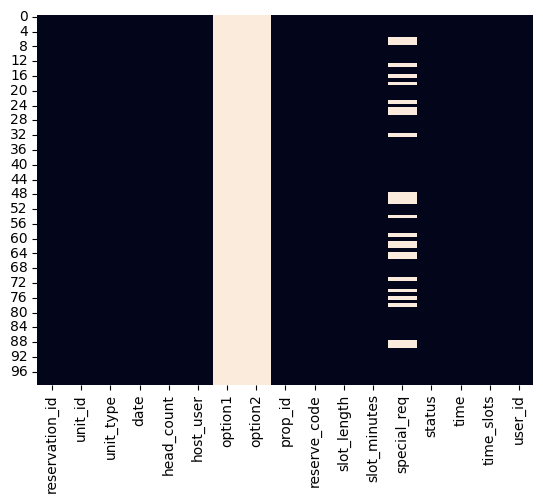

In [128]:
import seaborn as sns
sns.heatmap(dummy_df.isnull(), cbar=False)

In [129]:
# drop the columns with missing values
dummy_df = dummy_df.dropna(axis=1)



<Axes: >

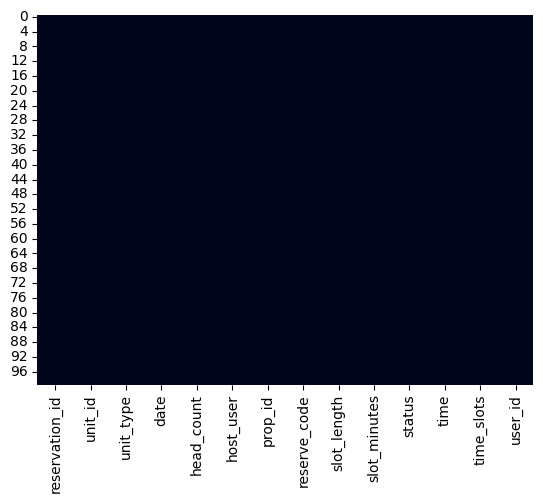

In [130]:
sns.heatmap(dummy_df.isnull(), cbar=False)


In [131]:
# Check for duplicate rows in the dataset.

duplicate_rows = dummy_df[dummy_df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [reservation_id, unit_id, unit_type, date, head_count, host_user, prop_id, reserve_code, slot_length, slot_minutes, status, time, time_slots, user_id]
Index: []


In [134]:
# Check for any missing values in the dataset.

dummy_df.isnull().sum()


reservation_id    0
unit_id           0
unit_type         0
date              0
head_count        0
host_user         0
prop_id           0
reserve_code      0
slot_length       0
slot_minutes      0
status            0
time              0
time_slots        0
user_id           0
dtype: int64

In [135]:
# Check the data types of the columns in the dataset.

dummy_df.dtypes


reservation_id     int64
unit_id            int64
unit_type         object
date              object
head_count         int64
host_user          int64
prop_id            int64
reserve_code       int64
slot_length        int64
slot_minutes       int64
status            object
time              object
time_slots         int64
user_id            int64
dtype: object

In [138]:
# Display the first few rows of the dataset.

dummy_df.head()


,reservation_id,unit_id,unit_type,date,head_count,host_user,prop_id,reserve_code,slot_length,slot_minutes,status,time,time_slots,user_id
0,1,69,type3,2023-10-03,106,687005,97,2,10,30,Cancelled,10:00:00,2,9575
1,2,46,type3,2023-04-21,37,362018,82,1,15,60,Cancelled,16:00:00,1,9108
2,3,93,type2,2023-06-19,123,794591,76,2,10,30,Cancelled,16:00:00,2,1264
3,4,25,type4,2023-11-24,80,781055,74,1,10,90,Booked,19:00:00,1,8981
4,5,18,type4,2023-08-28,102,728605,1,4,10,90,Booked,14:00:00,3,4738


In [139]:
# Step 3: Preprocess the Data

# This step includes converting date and time columns to the appropriate formats, extracting new features from them, and encoding categorical variables.


from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Convert date and time to datetime
    df['date'] = pd.to_datetime(df['date'])
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
    
    # Extract features from date and time
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
    
    # Encode categorical variables
    le_unit_type = LabelEncoder()
    df['unit_type'] = le_unit_type.fit_transform(df['unit_type'])
    
    le_status = LabelEncoder()
    df['status'] = le_status.fit_transform(df['status'])
    

    
    return df, le_unit_type, le_status

# Preprocess data
dummy_df, le_unit_type, le_status = preprocess_data(dummy_df)
print(dummy_df.head())









   reservation_id  unit_id  unit_type       date  head_count  host_user  \
0               1       69          2 2023-10-03         106     687005   
1               2       46          2 2023-04-21          37     362018   
2               3       93          1 2023-06-19         123     794591   
3               4       25          3 2023-11-24          80     781055   
4               5       18          3 2023-08-28         102     728605   

   prop_id  reserve_code  slot_length  slot_minutes  status      time  \
0       97             2           10            30       1  10:00:00   
1       82             1           15            60       1  16:00:00   
2       76             2           10            30       1  16:00:00   
3       74             1           10            90       0  19:00:00   
4        1             4           10            90       0  14:00:00   

   time_slots  user_id  day  month  hour  
0           2     9575    3     10    10  
1           1     9108  

In [140]:
# Step 4: Feature Engineering

# This step involves creating new features from the existing ones to improve the model's performance.

def create_features(df):
    # Create a new feature 'total_slots' by multiplying 'time_slots' and 'slot_length'
    df['total_slots'] = df['time_slots'] * df['slot_length']
    
    # Create a new feature 'total_minutes' by multiplying 'time_slots' and 'slot_minutes'
    df['total_minutes'] = df['time_slots'] * df['slot_minutes']

    # need to get the day of the week
    df['day_of_week'] = df['date'].dt.dayofweek

    return df

# Create new features
dummy_df = create_features(dummy_df)
print(dummy_df.head())


   reservation_id  unit_id  unit_type       date  head_count  host_user  \
0               1       69          2 2023-10-03         106     687005   
1               2       46          2 2023-04-21          37     362018   
2               3       93          1 2023-06-19         123     794591   
3               4       25          3 2023-11-24          80     781055   
4               5       18          3 2023-08-28         102     728605   

   prop_id  reserve_code  slot_length  slot_minutes  status      time  \
0       97             2           10            30       1  10:00:00   
1       82             1           15            60       1  16:00:00   
2       76             2           10            30       1  16:00:00   
3       74             1           10            90       0  19:00:00   
4        1             4           10            90       0  14:00:00   

   time_slots  user_id  day  month  hour  total_slots  total_minutes  \
0           2     9575    3     10    

In [141]:
# Step 5: Split the Data

# This step involves splitting the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Split the data into features and target variable

x_head_count = dummy_df[['unit_id', 'unit_type', 'host_user', 'prop_id', 'reserve_code', 'slot_length', 'slot_minutes', 'time_slots', 'user_id', 'day', 'month', 'hour', 'total_slots', 'total_minutes', 'day_of_week']]
y_head_count = dummy_df['head_count']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_head_count, y_head_count, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)




Training set shape: (80, 15) (80,)
Testing set shape: (20, 15) (20,)


In [142]:
# Step 6: Train a Model ( RandomForestRegressor)

# This step involves training a machine learning model on the training data.

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [143]:
# Step 7: Predict the Head Count

# This step involves making predictions on the test data using the trained model.

# Make predictions on the test data
y_test = y_test.astype(int)
y_pred = rf_model.predict(x_test).astype(int)

# Confusion matrix and accuracy for the model
from sklearn.metrics import confusion_matrix, accuracy_score

y_train = y_train.astype(int)
y_pred_train = rf_model.predict(x_train).astype(int)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


Training Accuracy: 0.0375
Testing Accuracy: 0.0


### Step 3: Evaluate the Model


In [144]:


# This step involves evaluating the model's performance using various metrics.

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared Value:", r2)



Mean Squared Error: 2159.0
R-squared Value: -0.1818415708256469


### Step 3: Save the Model as a Pickle File


In [145]:


# This step involves saving the trained model to a file for future use.

import pickle

# Save the model to a file
model_file = 'head_count_prediction_model.pkl'
with open(model_file, 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved to:", model_file)



Model saved to: head_count_prediction_model.pkl


### Step 4: Creating flask API


In [ ]:


# This step involves creating a Flask API to serve the model for making predictions.

from flask import Flask, request, jsonify

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)
    
# Initialize the Flask application
app = Flask(__name__)

# Define a route for the prediction function
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.get_json()
    
    # Convert the JSON data to a DataFrame
    data_df = pd.DataFrame(data)
    
    # Preprocess the data
    data_df, _, _ = preprocess_data(data_df)
    
    # Create new features
    data_df = create_features(data_df)
    
    # Make predictions
    predictions = model.predict(data_df)
    
    # Return the predictions as JSON
    return jsonify(predictions.tolist())

# Run the Flask application
if __name__ == '__main__':
    app.run(port=5000)


# Conclusion

# 

To test the API, you can use tools like Postman or cURL to send a POST request with the input data in JSON format to the URL http://localhost:5000/predict. The API will return the predicted head count as a JSON response.


In this project, we generated a dummy dataset for reservation data, preprocessed the data, trained a machine learning model to predict head count, evaluated the model's performance, and created a Flask API to serve the model for making predictions. This project demonstrates the end-to-end process of building a machine learning model and deploying it as a web service using Flask. You can further enhance the model by tuning hyperparameters, trying different algorithms, and adding more features to improve its performance.
